# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

data = pd.read_csv('data/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

## Select 2 principal features

In [2]:
# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(data)

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ]])

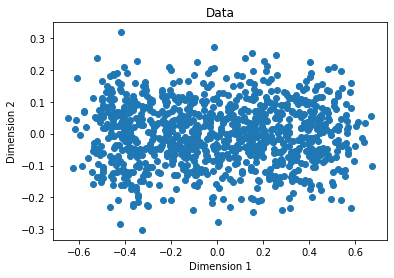

In [3]:
plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

## Find number of clusters to use

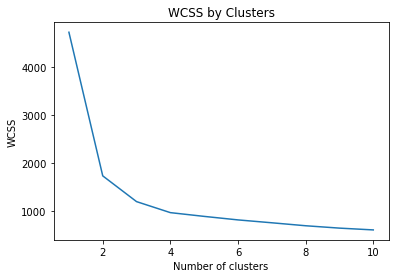

In [4]:
# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(data)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
# Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Build the model

In [5]:
k = 4
model = KMeans(n_clusters=k, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(data)
# View the cluster assignments
km_clusters

array([3, 3, 0, 0, 3, 3, 0, 2, 3, 3, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 3, 2,
       3, 3, 2, 1, 0, 3, 1, 2, 1, 3, 0, 2, 2, 3, 2, 2, 3, 2, 2, 2, 0, 1,
       0, 3, 3, 0, 0, 2, 3, 1, 0, 0, 0, 0, 2, 3, 0, 3, 3, 3, 3, 3, 2, 2,
       1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 2, 3, 1, 2, 1, 0, 1, 2, 0, 1, 2,
       2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 0,
       2, 1, 3, 3, 1, 0, 1, 0, 3, 1, 2, 1, 0, 0, 3, 2, 1, 2, 0, 3, 1, 1,
       1, 2, 1, 1, 2, 3, 2, 1, 3, 1, 1, 3, 0, 0, 2, 0, 2, 2, 0, 3, 3, 2,
       3, 1, 3, 2, 2, 2, 1, 3, 0, 0, 2, 1, 1, 3, 3, 0, 3, 1, 2, 0, 2, 1,
       1, 2, 2, 3, 2, 3, 1, 1, 2, 0, 3, 0, 0, 1, 1, 3, 1, 2, 0, 1, 2, 2,
       3, 0, 1, 0, 0, 0, 3, 3, 0, 2, 0, 3, 0, 0, 1, 3, 0, 2, 2, 0, 3, 0,
       2, 3, 1, 0, 1, 2, 1, 3, 1, 3, 2, 3, 1, 2, 3, 0, 0, 3, 0, 1, 0, 1,
       0, 2, 2, 1, 0, 3, 3, 2, 0, 2, 1, 1, 0, 0, 0, 3, 0, 3, 2, 0, 0, 2,
       3, 2, 1, 1, 1, 2, 0, 3, 2, 1, 3, 1, 0, 2, 2, 3, 0, 0, 1, 3, 3, 0,
       0, 1, 0, 3, 3, 1, 3, 0, 0, 0, 2, 2, 1, 3, 0,

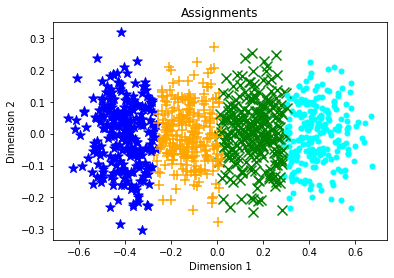

In [6]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue', 1:'green', 2:'orange', 3:'cyan'}
    mrk_dic = {0:'*', 1:'x', 2:'+', 3:'.'}
    # Assign colour and marker to each cluster
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    
    # Plot each sample using its respective colour and marker type
    for sample in range(len(clusters)):
        plt.scatter(
            samples[sample][0], 
            samples[sample][1], 
            color = colors[sample], 
            marker = markers[sample], 
            s = 100 #marker size
        )
    
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

## Build an agglomerative model

In [7]:
k = 4
agg_model = AgglomerativeClustering(n_clusters=k)
agg_clusters = agg_model.fit_predict(data)
agg_clusters

array([1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 3, 3, 2, 0, 2, 2, 3, 3, 2, 1, 2,
       1, 1, 2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 1, 3, 2, 2, 0, 3,
       0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 2, 1, 2, 2, 3, 0, 3, 2, 0, 3, 2,
       2, 3, 3, 3, 2, 2, 3, 2, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 0,
       2, 3, 1, 1, 3, 0, 3, 0, 1, 3, 2, 3, 0, 2, 1, 2, 3, 2, 0, 1, 3, 3,
       2, 2, 3, 3, 2, 1, 2, 3, 1, 3, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2,
       1, 3, 1, 2, 2, 2, 1, 1, 0, 0, 2, 3, 3, 1, 1, 0, 1, 3, 2, 0, 2, 1,
       3, 2, 3, 1, 2, 1, 2, 3, 3, 0, 1, 2, 0, 3, 3, 1, 3, 2, 0, 3, 2, 2,
       1, 0, 3, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 3, 1, 0, 3, 2, 0, 1, 0,
       2, 1, 1, 0, 3, 2, 3, 1, 3, 1, 2, 1, 3, 2, 1, 0, 0, 1, 2, 3, 2, 3,
       0, 2, 2, 1, 0, 1, 1, 3, 0, 2, 3, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2,
       1, 2, 3, 1, 3, 2, 0, 1, 2, 3, 1, 3, 0, 2, 2, 1, 0, 0, 3, 1, 1, 0,
       0, 3, 0, 1, 1, 3, 1, 2, 0, 0, 2, 2, 3, 1, 2,

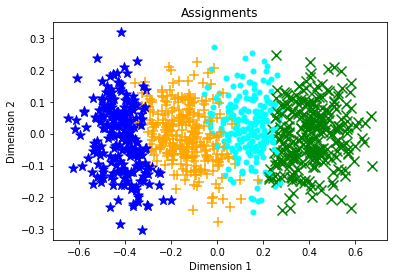

In [8]:
plot_clusters(features_2d, agg_clusters)